In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('/content/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Distribution of Target variable

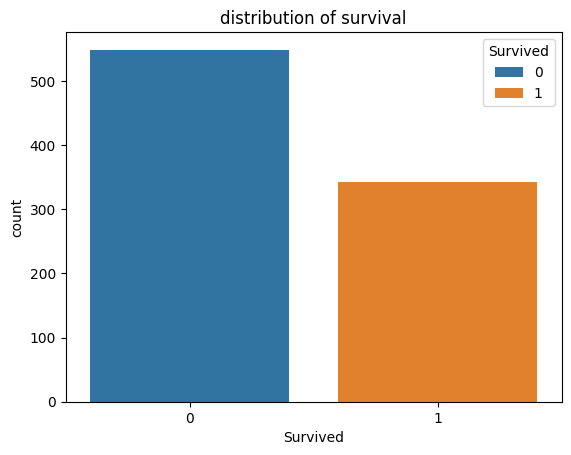

In [6]:
sns.countplot(x='Survived',data=df,hue='Survived')
plt.title('distribution of survival')
plt.show()

# Visualise the distribution of Variables

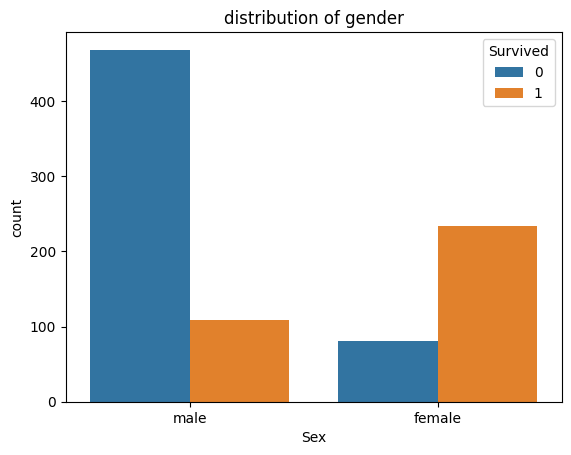

In [7]:
sns.countplot(x='Sex',data=df,hue='Survived')
plt.title('distribution of gender')
plt.show()

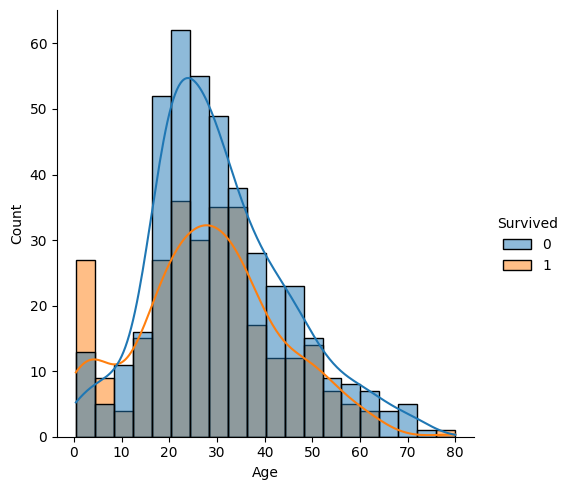

In [8]:
#distribution of age which survived
sns.displot(data=df,x="Age",kde=True,hue="Survived")

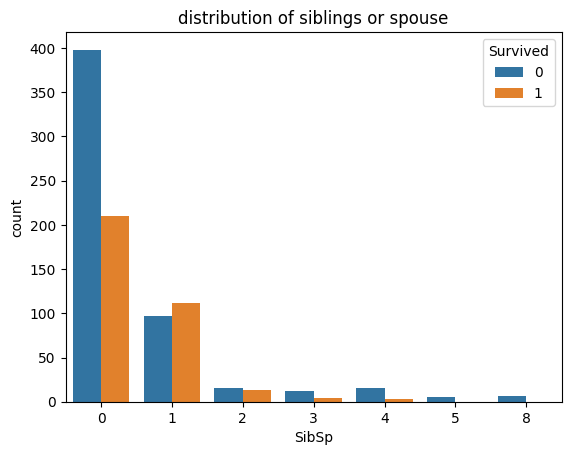

In [9]:
sns.countplot(x='SibSp',data=df,hue='Survived')
plt.title('distribution of siblings or spouse')
plt.show()

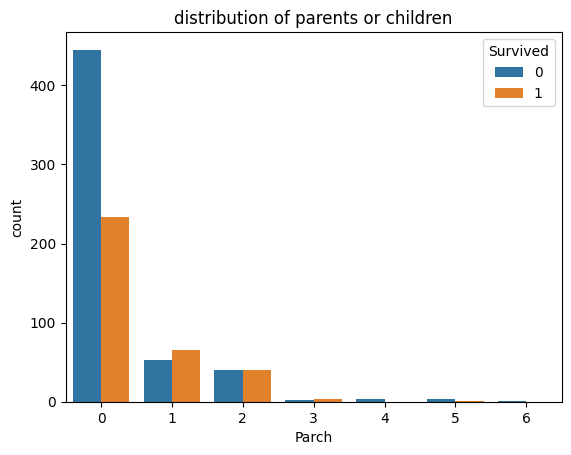

In [10]:
sns.countplot(x='Parch',data=df,hue='Survived')
plt.title('distribution of parents or children')
plt.show()

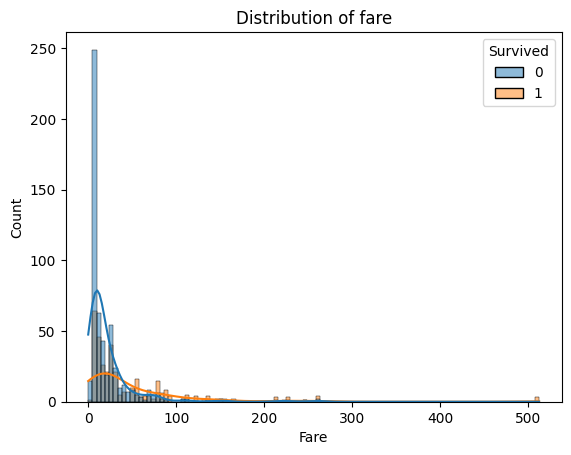

In [ ]:
sns.histplot(x='Fare',data=df,kde=True,hue='Survived')
plt.title('Distribution of fare')
plt.show()


<Axes: xlabel='Pclass', ylabel='Age'>

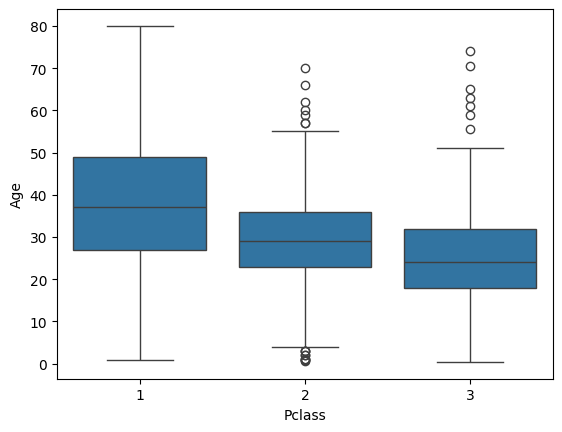

In [ ]:
#It shows the average age of different passenger class survived
sns.boxplot(x='Pclass',y='Age',data=df)

# Dealing with missing value

In [11]:
#fill missing value for 'Age'with median
df['Age'].fillna(df['Age'].median(),inplace=True)

In [12]:
#fill missing value for 'Embarked'with mode
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [13]:
#drop 'Cabin' column as it has too many missing values
df.drop('Cabin',axis=1,inplace=True)

In [14]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [18]:
#Drop unnecessary columns
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [21]:
df["Sex"]=df["Sex"].map({"male":0,"female":1})
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S
887,1,1,1,19.0,0,0,30.0000,S
888,0,3,1,28.0,1,2,23.4500,S
889,1,1,0,26.0,0,0,30.0000,C


In [22]:
df["Embarked"]=df["Embarked"].map({"C":1,"Q":2,"S":3})
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,3
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,3
3,1,1,1,35.0,1,0,53.1000,3
4,0,3,0,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,3
887,1,1,1,19.0,0,0,30.0000,3
888,0,3,1,28.0,1,2,23.4500,3
889,1,1,0,26.0,0,0,30.0000,1


In [23]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,3
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,3
3,1,1,1,35.0,1,0,53.1000,3
4,0,3,0,35.0,0,0,8.0500,3


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


# Applying logistic regression model

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

In [45]:
X=df.drop(['Survived'],axis=1)
Y=df['Survived']

In [47]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=45)

In [49]:
logistic_model=LogisticRegression()
logistic_model.fit(x_train,y_train)

LogisticRegression()

In [50]:
y_pred_train=logistic_model.predict(x_train)
y_pred_test=logistic_model.predict(x_test)

In [52]:
print('training accuracy:',accuracy_score(y_train,y_pred_train))
print('testing accuracy:',accuracy_score(y_test,y_pred_test))
print('classification report:',classification_report(y_test,y_pred_test))

training accuracy: 0.7874251497005988
testing accuracy: 0.8340807174887892
classification report:               precision    recall  f1-score   support

           0       0.88      0.87      0.87       145
           1       0.76      0.77      0.76        78

    accuracy                           0.83       223
   macro avg       0.82      0.82      0.82       223
weighted avg       0.83      0.83      0.83       223

